# Test results on Combined Filters
This file is part of the bachelor thesis of Jad Dayoub, 7425569. The synthetic data generation made with ML-PPA, credits to Andrei Kazantsev, Tim Oelkers, Yurii Pidopryhora, Tanumoy Saha, Marcel Trattner and Hermann Heßling.

This file contains the results of applying the best Filters at detecting Pulsars as custom filter for training on pulsar data.

In [1]:
import sys
import os

# Annahme: Das Skript wird im results-Ordner ausgeführt
current_dir = os.getcwd()

# Pfad zum src-Ordner zum Python-Pfad hinzufügen
src_path = os.path.abspath(os.path.join(current_dir, '..', 'src'))
sys.path.append(src_path)

# Jetzt kannst du die Module direkt aus dem src-Ordner importieren
import numpy as np
from filter_testing import *
from custom_filters import *

In [2]:
prewitt_x = prewitt_filter("x")
prewitt_y = prewitt_filter("y")

sobel_x = sobel_filter("x")
sobel_y = sobel_filter("y")

kirsch_n = kirsch_filter("N")
kirsch_ne = kirsch_filter("NE")
kirsch_e = kirsch_filter("E")
kirsch_se = kirsch_filter("SE")
kirsch_s = kirsch_filter("S")
kirsch_sw = kirsch_filter("SW")
kirsch_w = kirsch_filter("W")
kirsch_nw = kirsch_filter("NW")

## 32x32 Datasets

### Pulsar and Non-Pulsar Dataset

In [3]:
dataset = np.load("../data/32x32_ml_ppa_data_binary.npz")
labels = dataset["labels"]
file = dataset.files[2]
data = dataset[file]
noise = int(file.split("_")[1])

bs = 16
lr = 0.001

Train model: 100%|██████████| 50/50 [02:52<00:00,  3.45s/it]


Accuracy default: 98.75%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [02:48<00:00,  3.37s/it]


Accuracy default: 96.25%
Accuracy custom: 99.75%


Train model: 100%|██████████| 50/50 [02:51<00:00,  3.43s/it]


Accuracy default: 99.0%
Accuracy custom: 98.75%


Train model: 100%|██████████| 50/50 [02:47<00:00,  3.34s/it]


Accuracy default: 99.75%
Accuracy custom: 99.25%


Train model: 100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Accuracy default: 96.5%
Accuracy custom: 99.75%


Train model: 100%|██████████| 50/50 [02:46<00:00,  3.33s/it]


Accuracy default: 97.0%
Accuracy custom: 99.75%


Train model: 100%|██████████| 50/50 [02:55<00:00,  3.51s/it]


Accuracy default: 99.0%
Accuracy custom: 98.75%


Train model: 100%|██████████| 50/50 [02:44<00:00,  3.28s/it]


Accuracy default: 97.75%
Accuracy custom: 98.75%


Train model: 100%|██████████| 50/50 [02:56<00:00,  3.54s/it]


Accuracy default: 96.75%
Accuracy custom: 98.5%


Train model: 100%|██████████| 50/50 [02:46<00:00,  3.33s/it]


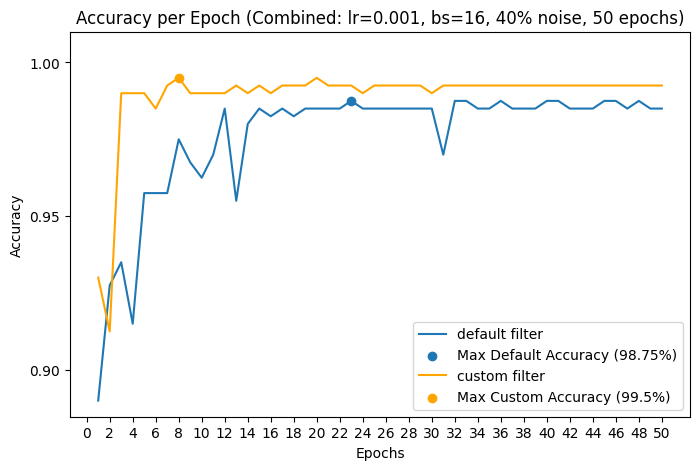

Accuracy default: 98.5%
Accuracy custom: 99.25%
Avg Default Acc after 10 runs: 0.9792499999999998
Avg Custom Acc after 10 runs: 0.9914999999999999


In [4]:
epochs = 50
d_acc_hist = []
c_acc_hist = []

for i in range(10):
    if i == 9:
        d_acc, c_acc = test_1(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=True)
    else:
        d_acc, c_acc = test_1(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=False)
    d_acc_hist.append(d_acc)
    c_acc_hist.append(c_acc)

print(f"Avg Default Acc after 10 runs: {np.sum(d_acc_hist)/10}")
print(f"Avg Custom Acc after 10 runs: {np.sum(c_acc_hist)/10}")

Train model: 100%|██████████| 50/50 [02:58<00:00,  3.56s/it]


Accuracy default: 98.0%
Accuracy custom: 97.75%


Train model: 100%|██████████| 50/50 [02:46<00:00,  3.33s/it]


Accuracy default: 98.75%
Accuracy custom: 99.5%


Train model: 100%|██████████| 50/50 [03:02<00:00,  3.65s/it]


Accuracy default: 98.75%
Accuracy custom: 99.25%


Train model: 100%|██████████| 50/50 [02:49<00:00,  3.38s/it]


Accuracy default: 97.5%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [03:01<00:00,  3.63s/it]


Accuracy default: 98.0%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [02:43<00:00,  3.28s/it]


Accuracy default: 97.5%
Accuracy custom: 99.25%


Train model: 100%|██████████| 50/50 [03:05<00:00,  3.72s/it]


Accuracy default: 98.25%
Accuracy custom: 99.5%


Train model: 100%|██████████| 50/50 [02:50<00:00,  3.41s/it]


Accuracy default: 99.0%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [03:08<00:00,  3.77s/it]


Accuracy default: 96.75%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [02:46<00:00,  3.33s/it]


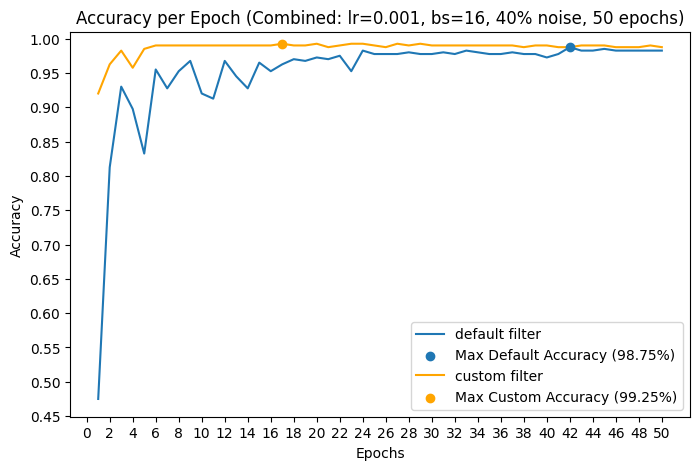

Accuracy default: 98.25%
Accuracy custom: 98.75%
Avg Default Acc after 10 runs: 0.9807499999999999
Avg Custom Acc after 10 runs: 0.99


In [5]:
epochs = 50
d_acc_hist = []
c_acc_hist = []

for i in range(10):
    if i == 9:
        d_acc, c_acc = test_2(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=True)
    else:
        d_acc, c_acc = test_2(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=False)
    d_acc_hist.append(d_acc)
    c_acc_hist.append(c_acc)

print(f"Avg Default Acc after 10 runs: {np.sum(d_acc_hist)/10}")
print(f"Avg Custom Acc after 10 runs: {np.sum(c_acc_hist)/10}")

### Pulsar, Non-Pulsar, BBRFI and NBRFI Dataset

In [6]:
dataset = np.load("../data/32x32_ml_ppa_data_multi.npz")
labels = dataset["labels"]
data = dataset["data"]
noise = 40

bs = 16
lr = 0.001

Train model: 100%|██████████| 50/50 [03:01<00:00,  3.63s/it]


Accuracy default: 98.25%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [02:50<00:00,  3.42s/it]


Accuracy default: 97.5%
Accuracy custom: 98.5%


Train model: 100%|██████████| 50/50 [03:02<00:00,  3.66s/it]


Accuracy default: 98.5%
Accuracy custom: 99.5%


Train model: 100%|██████████| 50/50 [02:49<00:00,  3.40s/it]


Accuracy default: 97.5%
Accuracy custom: 99.5%


Train model: 100%|██████████| 50/50 [03:00<00:00,  3.61s/it]


Accuracy default: 97.0%
Accuracy custom: 98.5%


Train model: 100%|██████████| 50/50 [02:45<00:00,  3.30s/it]


Accuracy default: 96.5%
Accuracy custom: 99.25%


Train model: 100%|██████████| 50/50 [03:02<00:00,  3.66s/it]


Accuracy default: 96.5%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [02:50<00:00,  3.41s/it]


Accuracy default: 98.25%
Accuracy custom: 98.25%


Train model: 100%|██████████| 50/50 [03:01<00:00,  3.63s/it]


Accuracy default: 97.25%
Accuracy custom: 97.0%


Train model: 100%|██████████| 50/50 [02:46<00:00,  3.34s/it]


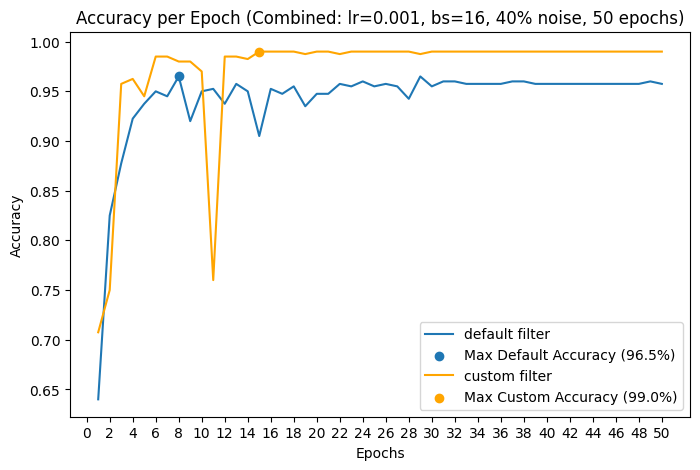

Accuracy default: 95.75%
Accuracy custom: 99.0%
Avg Default Acc after 10 runs: 0.9730000000000001
Avg Custom Acc after 10 runs: 0.9875


In [7]:
epochs = 50
d_acc_hist = []
c_acc_hist = []

for i in range(10):
    if i == 9:
        d_acc, c_acc = test_1(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=True)
    else:
        d_acc, c_acc = test_1(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=False)
    d_acc_hist.append(d_acc)
    c_acc_hist.append(c_acc)

print(f"Avg Default Acc after 10 runs: {np.sum(d_acc_hist)/10}")
print(f"Avg Custom Acc after 10 runs: {np.sum(c_acc_hist)/10}")

Train model: 100%|██████████| 50/50 [03:02<00:00,  3.65s/it]


Accuracy default: 98.25%
Accuracy custom: 98.75%


Train model: 100%|██████████| 50/50 [02:50<00:00,  3.41s/it]


Accuracy default: 98.25%
Accuracy custom: 99.75%


Train model: 100%|██████████| 50/50 [03:01<00:00,  3.63s/it]


Accuracy default: 98.0%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Accuracy default: 97.5%
Accuracy custom: 99.25%


Train model: 100%|██████████| 50/50 [03:00<00:00,  3.60s/it]


Accuracy default: 98.0%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Accuracy default: 96.5%
Accuracy custom: 98.25%


Train model: 100%|██████████| 50/50 [02:00<00:00,  2.40s/it]


Accuracy default: 97.75%
Accuracy custom: 98.25%


Train model: 100%|██████████| 50/50 [00:14<00:00,  3.42it/s]


Accuracy default: 96.75%
Accuracy custom: 99.0%


Train model: 100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


Accuracy default: 97.5%
Accuracy custom: 99.75%


Train model: 100%|██████████| 50/50 [00:16<00:00,  2.99it/s]


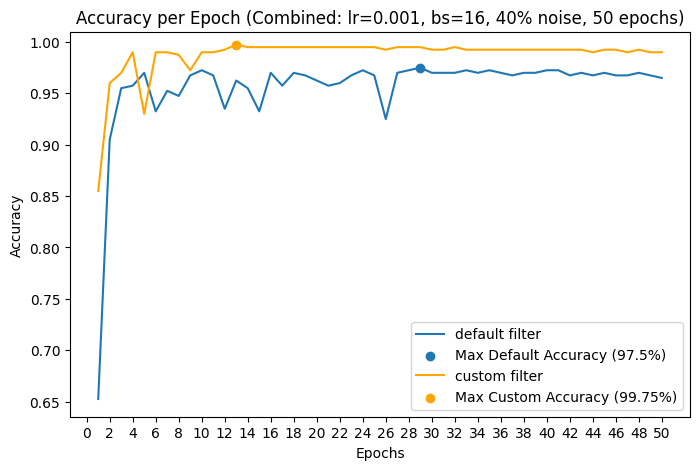

Accuracy default: 96.5%
Accuracy custom: 99.0%
Avg Default Acc after 10 runs: 0.975
Avg Custom Acc after 10 runs: 0.99


In [8]:
epochs = 50
d_acc_hist = []
c_acc_hist = []

for i in range(10):
    if i == 9:
        d_acc, c_acc = test_2(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=True)
    else:
        d_acc, c_acc = test_2(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=False)
    d_acc_hist.append(d_acc)
    c_acc_hist.append(c_acc)

print(f"Avg Default Acc after 10 runs: {np.sum(d_acc_hist)/10}")
print(f"Avg Custom Acc after 10 runs: {np.sum(c_acc_hist)/10}")

## 256x256 Datasets

### Binary

In [9]:
dataset = np.load("../data/256x256_ml_ppa_data_binary.npz")
labels = dataset["labels"]
file = dataset.files[0]
data = dataset[file]
noise = int(file.split("_")[1])

bs = 16
lr = 0.001

Train model: 100%|██████████| 50/50 [01:35<00:00,  1.90s/it]


Accuracy default: 92.0%
Accuracy custom: 84.5%


Train model: 100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


Accuracy default: 91.5%
Accuracy custom: 82.0%


Train model: 100%|██████████| 50/50 [01:33<00:00,  1.87s/it]


Accuracy default: 87.5%
Accuracy custom: 82.5%


Train model: 100%|██████████| 50/50 [01:33<00:00,  1.87s/it]


Accuracy default: 88.5%
Accuracy custom: 73.5%


Train model: 100%|██████████| 50/50 [01:32<00:00,  1.85s/it]


Accuracy default: 88.5%
Accuracy custom: 85.0%


Train model: 100%|██████████| 50/50 [01:36<00:00,  1.92s/it]


Accuracy default: 87.5%
Accuracy custom: 87.5%


Train model: 100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


Accuracy default: 92.0%
Accuracy custom: 86.5%


Train model: 100%|██████████| 50/50 [01:33<00:00,  1.87s/it]


Accuracy default: 88.5%
Accuracy custom: 83.5%


Train model: 100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


Accuracy default: 87.5%
Accuracy custom: 83.0%


Train model: 100%|██████████| 50/50 [01:49<00:00,  2.18s/it]


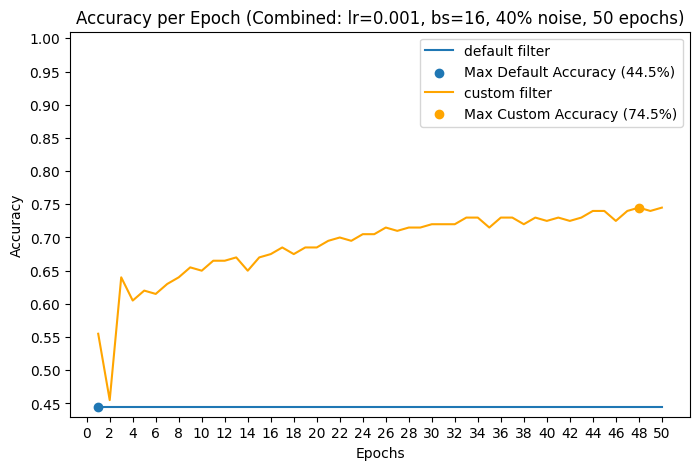

Accuracy default: 44.5%
Accuracy custom: 74.5%
Avg Default Acc after 10 runs: 0.8480000000000001
Avg Custom Acc after 10 runs: 0.8225


In [10]:
epochs = 50
d_acc_hist = []
c_acc_hist = []

for i in range(10):
    if i == 9:
        d_acc, c_acc = test_1(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=True)
    else:
        d_acc, c_acc = test_1(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=False)
    d_acc_hist.append(d_acc)
    c_acc_hist.append(c_acc)

print(f"Avg Default Acc after 10 runs: {np.sum(d_acc_hist)/10}")
print(f"Avg Custom Acc after 10 runs: {np.sum(c_acc_hist)/10}")

Train model: 100%|██████████| 50/50 [13:42<00:00, 16.44s/it]


Accuracy default: 89.0%
Accuracy custom: 82.5%


Train model: 100%|██████████| 50/50 [14:33<00:00, 17.48s/it]


Accuracy default: 90.0%
Accuracy custom: 89.0%


Train model: 100%|██████████| 50/50 [14:08<00:00, 16.98s/it]


Accuracy default: 87.0%
Accuracy custom: 75.0%


Train model: 100%|██████████| 50/50 [12:58<00:00, 15.56s/it]


Accuracy default: 91.5%
Accuracy custom: 67.5%


Train model: 100%|██████████| 50/50 [13:01<00:00, 15.62s/it]


Accuracy default: 87.5%
Accuracy custom: 84.5%


Train model: 100%|██████████| 50/50 [13:40<00:00, 16.41s/it]


Accuracy default: 88.5%
Accuracy custom: 86.0%


Train model: 100%|██████████| 50/50 [14:44<00:00, 17.69s/it]


Accuracy default: 88.0%
Accuracy custom: 83.5%


Train model: 100%|██████████| 50/50 [13:56<00:00, 16.74s/it]


Accuracy default: 89.0%
Accuracy custom: 86.0%


Train model: 100%|██████████| 50/50 [12:58<00:00, 15.57s/it]


Accuracy default: 88.0%
Accuracy custom: 79.0%


Train model: 100%|██████████| 50/50 [12:54<00:00, 15.49s/it]


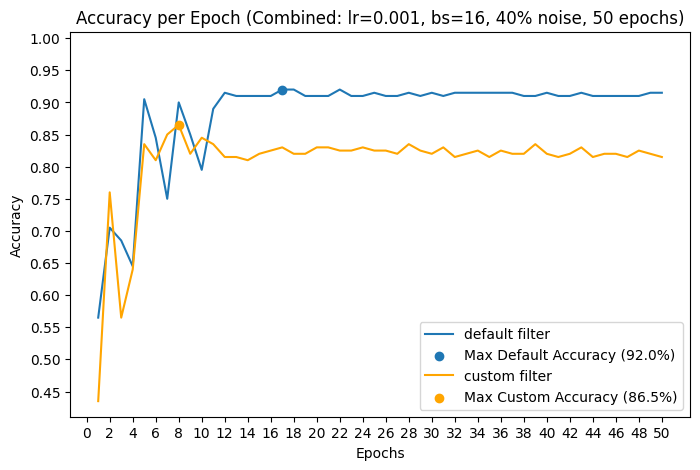

Accuracy default: 91.5%
Accuracy custom: 81.5%
Avg Default Acc after 10 runs: 0.89
Avg Custom Acc after 10 runs: 0.8145


In [12]:
epochs = 50
d_acc_hist = []
c_acc_hist = []

for i in range(10):
    if i == 9:
        d_acc, c_acc = test_2(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=True)
    else:
        d_acc, c_acc = test_2(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=False)
    d_acc_hist.append(d_acc)
    c_acc_hist.append(c_acc)

print(f"Avg Default Acc after 10 runs: {np.sum(d_acc_hist)/10}")
print(f"Avg Custom Acc after 10 runs: {np.sum(c_acc_hist)/10}")

### Multi

Haven't tested that because of their poor performance on binary 256x256

In [13]:
dataset = np.load("../data/256x256_ml_ppa_data_multi.npz")
labels = dataset["labels"]
file = dataset.files[0]
data = dataset[file]
noise = int(file.split("_")[1])

In [ ]:
epochs = 50
d_acc_hist = []
c_acc_hist = []

for i in range(10):
    if i == 9:
        d_acc, c_acc = test_1(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=True)
    else:
        d_acc, c_acc = test_1(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=False)
    d_acc_hist.append(d_acc)
    c_acc_hist.append(c_acc)

print(f"Avg Default Acc after 10 runs: {np.sum(d_acc_hist)/10}")
print(f"Avg Custom Acc after 10 runs: {np.sum(c_acc_hist)/10}")

In [ ]:
epochs = 50
d_acc_hist = []
c_acc_hist = []

for i in range(10):
    if i == 9:
        d_acc, c_acc = test_2(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=True)
    else:
        d_acc, c_acc = test_2(data, labels, noise, bs, epochs, lr, [prewitt_y, sobel_y, kirsch_e, kirsch_se, kirsch_w, kirsch_nw], title="Combined", return_acc=True, plot=False)
    d_acc_hist.append(d_acc)
    c_acc_hist.append(c_acc)

print(f"Avg Default Acc after 10 runs: {np.sum(d_acc_hist)/10}")
print(f"Avg Custom Acc after 10 runs: {np.sum(c_acc_hist)/10}")